## What is STEM?
STEM is a teaching technique that brings together four diciplines which are Science, Technology, Engineering and Math.

## About This Project
In this project, we will examine the data set we have and construct a suitable prediction model.

## What is the path that we will follow?
We categorize our path as 5 subtitle:
1. Data Collection
2. Data Preprocessing and Cleaning
3. Data Exploration and Analysis
4. Predictive Modelling
5. Model Evaluation and Visualizations

## 1. Data Collection

At the beginning of this project, we imported all general libraries to show our codes clearer. Here you can check the libraries that we use. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install opendatasets
import opendatasets as od
import os


od.download("https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries")
if os.name == "nt":
    df = pd.read_csv(r".\data-science-and-stem-salaries\Levels_Fyi_Salary_Data.csv")
else:
    df = pd.read_csv(r"./data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv")


Skipping, found downloaded files in ".\data-science-and-stem-salaries" (use force=True to force download)


In [3]:
df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


With this line, we are obtaining our data and showing first 5 rows.

#### Here are our first impressions about our dataset:
1. We can see workers private data such as titlies, their companies, their races, and their locations.
2. We can see workers educational levels,degrees, and their the years of experiences.
3. We can see their base salaries.
4. And there are some NaN values and unnecessary columns for our project such as "timestamp".


### Features
timestamp: the entrance year of employeers to the company

company: company name of employees work

level: employee's position

title: employee's work area

totalyearlycompensation: the amount set aside to keep the employee in the company

location: location of employees

yearsofexperience: total years of work experience

yearsatcompany: total years at same company

tag: the field that employee's specialized

basesalary: lowest salary they can get per year

stockgrantvalue: grant value they own

bonus: bonus salary

Degrees, Races, and Educational Situations.

## 2. Data Preprocessing and Cleaning

At the beginning, we would like to delete features that we will not use from the dataset, so that we create less confusion.

In [4]:
df = df.drop( columns = 'timestamp')

After our first impressions, we really need to know our data, what are the means, what are the counts for every feature. To get these informations, we implement these code.

(But first of all, when we were checking our dataset's csv file, we detected an error in our data set which is in gender column, in this column it shows one persons gender as "Title: Senior Software Engineer". So we will drop this row.)

In [5]:
df =df.drop([11010], axis=0)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,62641.0,216300.554046,138034.840790,10000.0,135000.0,188000.0,264000.0,4980000.0
yearsofexperience,62641.0,7.204011,5.840339,0.0,3.0,6.0,10.0,69.0
yearsatcompany,62641.0,2.702072,3.263678,0.0,0.0,2.0,4.0,69.0
basesalary,62641.0,136686.637745,61369.556536,0.0,108000.0,140000.0,170000.0,1659870.0
stockgrantvalue,62641.0,51486.407772,81875.182005,0.0,0.0,25000.0,65000.0,2800000.0
bonus,62641.0,19335.039283,26781.405617,0.0,1000.0,14000.0,26000.0,1000000.0
cityid,62641.0,9856.154068,6679.147107,0.0,7369.0,7839.0,11521.0,47926.0
dmaid,62639.0,616.096920,289.845693,0.0,506.0,807.0,807.0,881.0
rowNumber,62641.0,41695.150253,24488.828674,1.0,20070.0,42020.0,63022.0,83875.0
Masters_Degree,62641.0,0.245702,0.430506,0.0,0.0,0.0,0.0,1.0








1. As they are seen, there are both categorical and numerical values in our data set.
2. Look yearsofexperience and yearsatcompany rows there. Their max values are both 69. So we can predict that there is a well-established company and their founders or co-founders are still working in this company.
3. We see that base salaries mean is 136686.637745. We can say that the average of people gets very high salaries per year. (When we compare these salaries to Turkey.) Also, when we check the min value, wee see 0 as a base salary. We can predict this worker as a intern, or may be a NaN value. 
4. Lastly, we see that max stockgrantvalue is too high. From this information, We can say that some companies care about keeping its employees in the company.

When we were trying to get information about our dataset, we noticed that there are too many 0 values. We considered that there can be more NaN values that we thought. Hence, we wrote a code line to see how many NaN values are there in our data set.

In [6]:
df.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22504
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40214
Education                  32271
dtype: int64

In [7]:
df.shape

(62641, 28)

Most of the features don't have any NaN values, however, there are some attributes like "Race" and "Education" that more than half of the values are NaN. So we have to decide whether fill the NaN values or delete them according to their importance for our dataset. First of all, we need to examine them.

In [8]:
df["Race"].value_counts()

Asian          11772
White           8032
Hispanic        1129
Two Or More      804
Black            690
Name: Race, dtype: int64

In [9]:
df["Education"].value_counts()

Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64

Based on the above observations, we thought that the data we have could be important, so we decided to do not delete the columns as they are. 

However, we could not leave the missing values as they are. Therefore, we decided to fill the missing values with the method we chose.

There are two types in our dataset: Categorical attributes and numerical attributes. 

For this reason, we have chosen separate methods of filling. We thought that the best method would be to write a prediction algorithm, but we did not want to prolong the readability period of our project, since we will be training a lot of models in the after a while.

Thus, we decided to fill the missing values with the most frequently occurring value for the categorical values, and the median for the numerical values.

In [10]:
numerical = df.select_dtypes(["float64","int64"])
categorical = df.select_dtypes(["object"])

for column in numerical.columns:
    df[column].fillna(df[column].median(), inplace=True)

for column in categorical.columns:
    df[column].fillna(df[column].mode().values[0], inplace=True)

## 3. Data Exploration and Analysis

In the first phase of our analysis, we wanted to see how our features were distributed. We visualized the histogram plot of each feature to get the best view of the distribution.

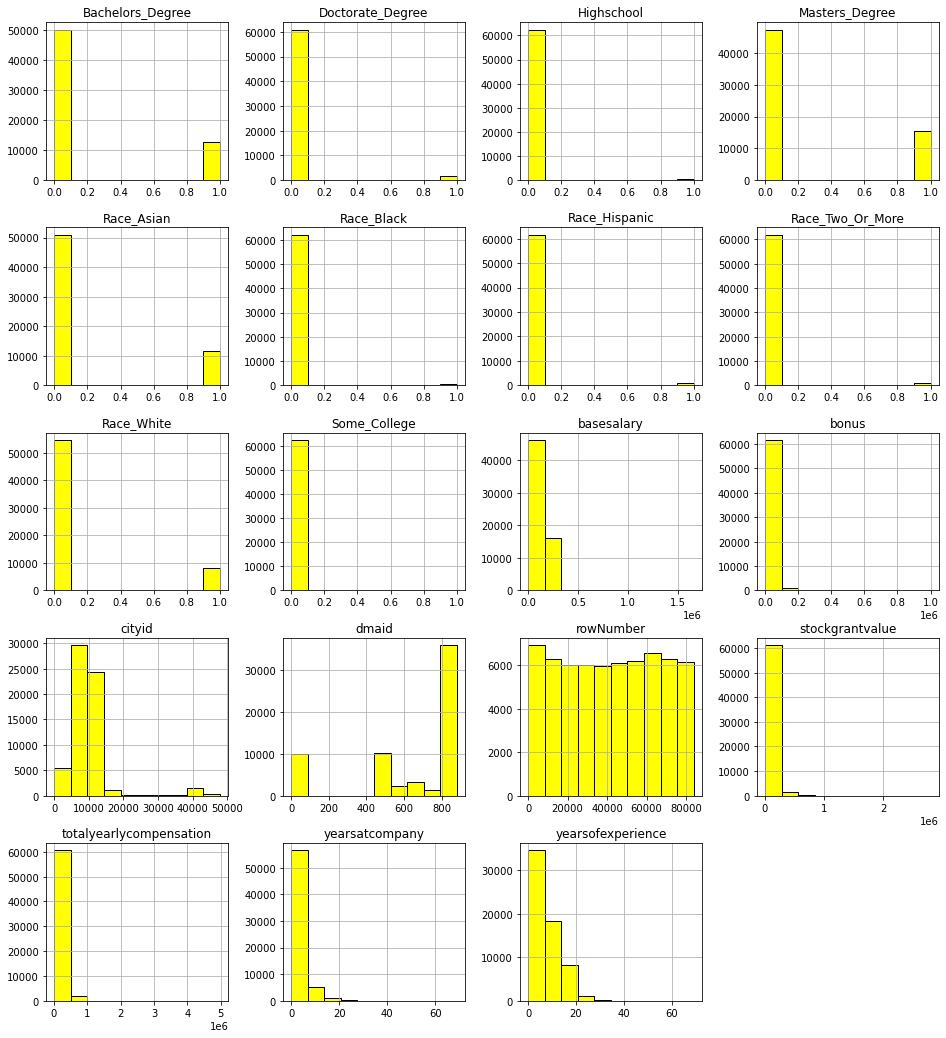

In [11]:
df.hist(figsize = (16,18), color="yellow", edgecolor="black");

Looking at the graphs above, we observed that most of our data is discrete. This showed us that we have more categorical data than numerical data. Also, looking at the data above, we observed that yearsofexperience and basesalary have close distributions. Finally, by looking at cityid, we observed that a certain group of people live in the same locations.

We observed that the above distribution graphs do not give us much information. Therefore, the following question came to our mind: "Do these variables have any effect on each other? If so, what is the ratio?" To get an answer to these questions, we decided to look at correlations between attributes. In order to present the correlations better, we performed these operations on the heatmap graph.

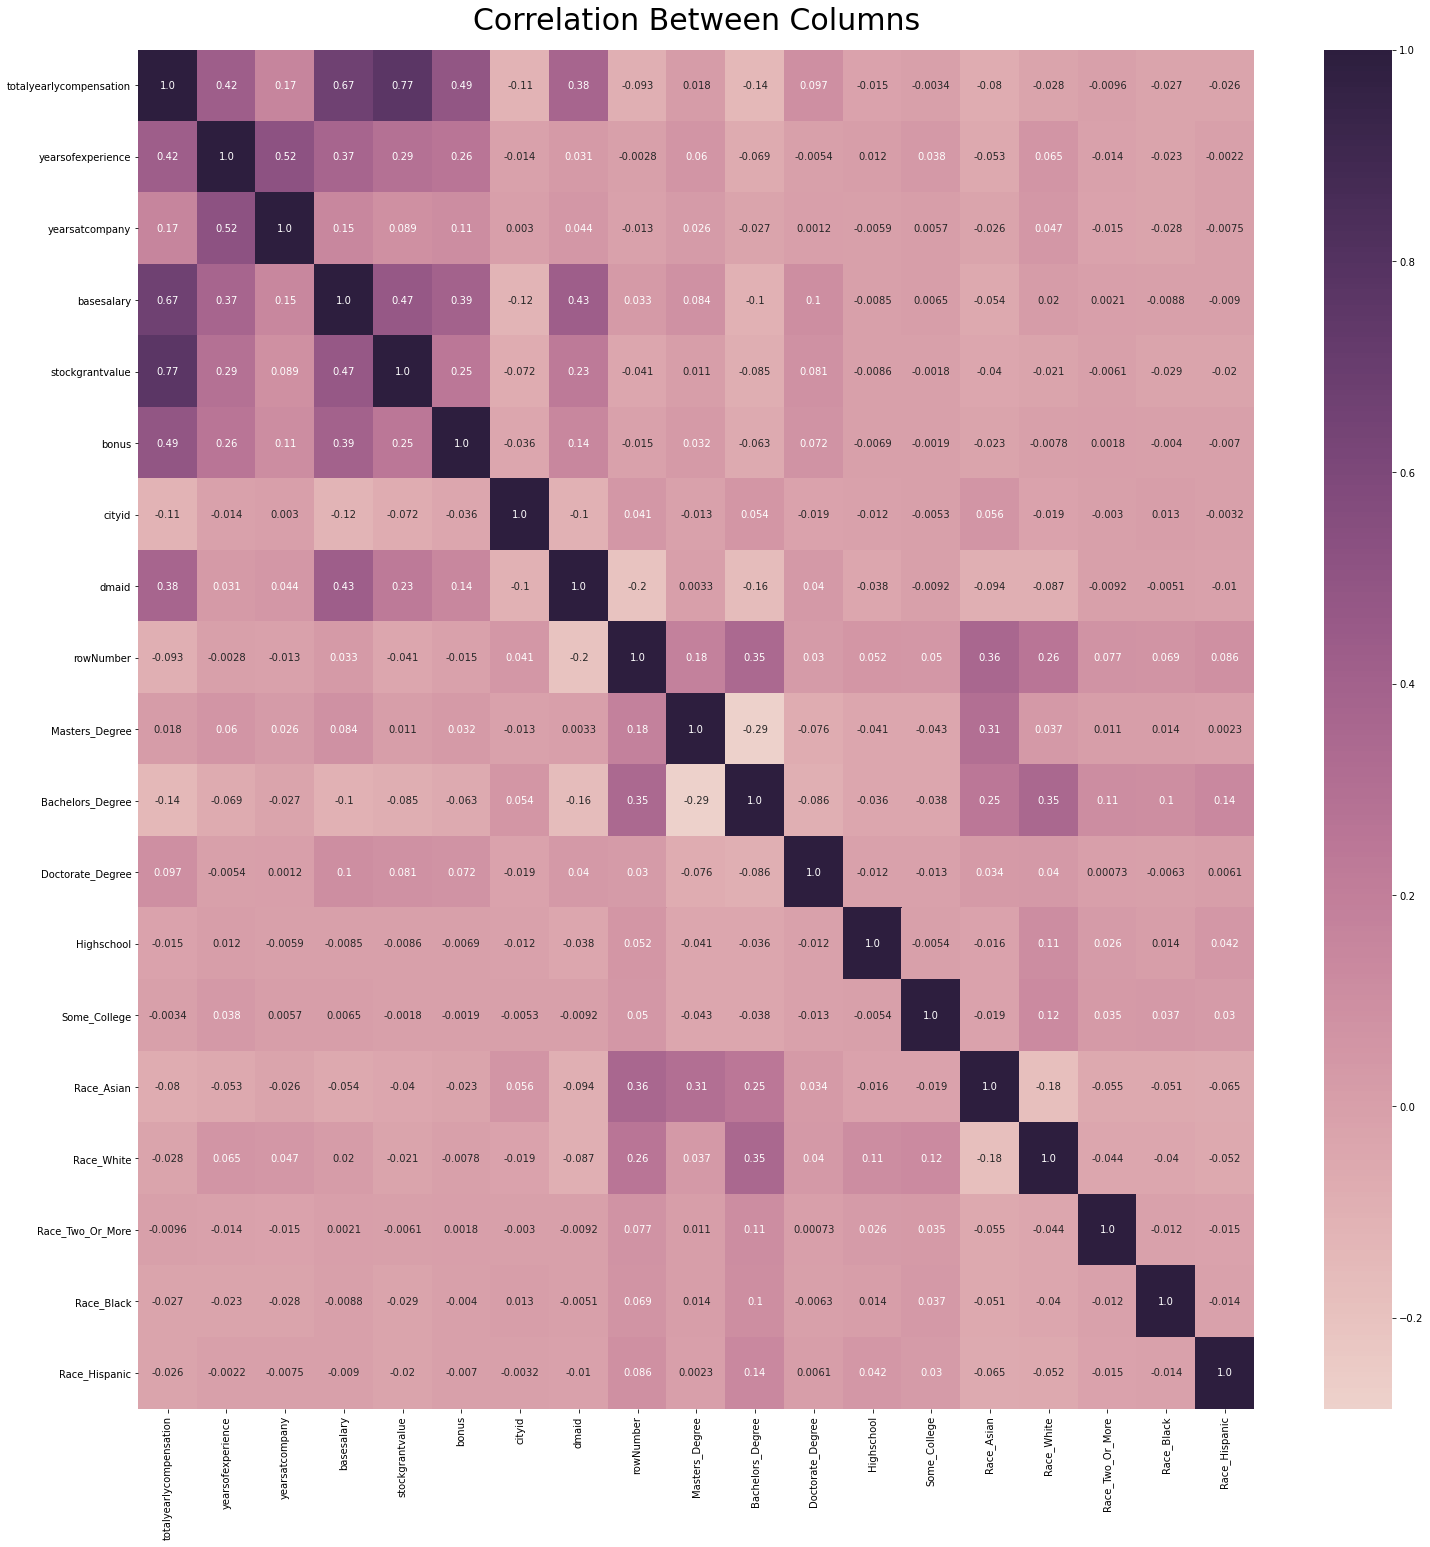

In [12]:
plt.figure(figsize = (25,25))
cmap= sns.cubehelix_palette(as_cmap=True)
corrMap = sns.heatmap(df.corr(), annot=True, fmt = '0.2', cmap=cmap)
corrMap.set_title('Correlation Between Columns', fontdict={'fontsize':30}, pad=20);

By looking at the correlation table, we can say that there is a considerable positive correlation between several columns. 

The highest positive correlation sample we observed is between stockgrantvalue and totalyearlycomplemansation with 0.77. Our next highest value is 0.67 and it's between totalyearlycomplemansation and basesalary. With a little internet research we learned what compensation means. "Yearly compensation, in the simplest terms, is the combination of your base salary and the value of any financial benefits your employer provides." Looking at this expression, we see that the above correlations are significant. But we were surprised that the correlation value between basesalary and stockgrantvalue is 0.47. We expected a higher correlation value.

In negative correlation samples, the strongest level is -0.29. However, we think that this value is not a sufficient negative correlation value.

Finally, we can say that we came to the most colorful and fun part of our project. Below, we will compare and comment on a few features. Hope you like the colors :)

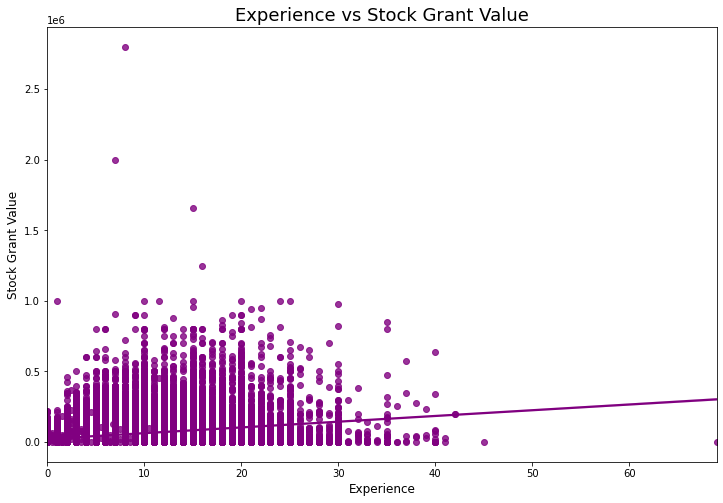

In [13]:
plt.figure(figsize=(12,8))
sns.regplot(x=df["yearsofexperience"], y=df["stockgrantvalue"], color='purple')
plt.title("Experience vs Stock Grant Value", size=18)
plt.xlabel("Experience", size=12)
plt.ylabel("Stock Grant Value", size=12)
plt.show()

sns.regplot() is a method we just discovered. With this method, we visualize the data points we have; also create and draw a regression model that suitable for these points.

When we examine the image above, we can say that there is a positive regression between stockgrantvalue and yearsofexperience, although it is not strong.

Thus, we interpret that as the years of experience increases, the stock grant value increases.

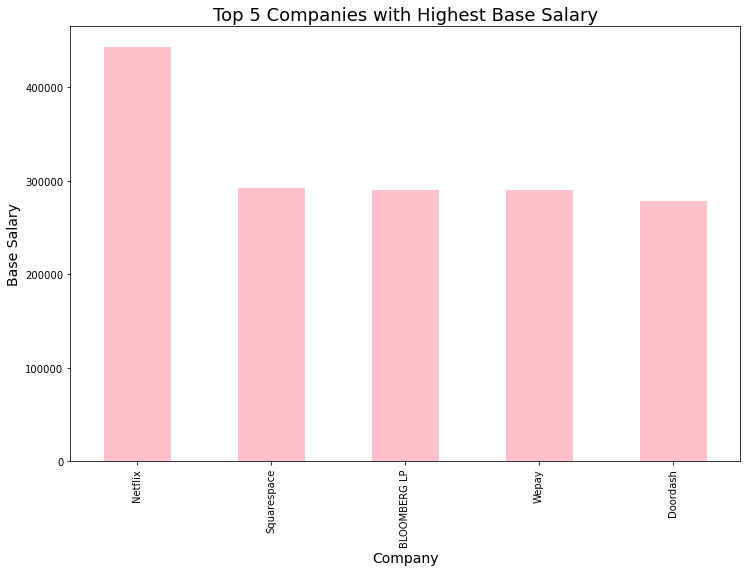

In [14]:
plt.figure(figsize=(12,8))
companies = df.groupby(["company"]).mean()
companies.sort_values(by="basesalary", ascending=False).head(5)["basesalary"].plot(kind="bar", color = 'pink')
plt.title("Top 5 Companies with Highest Base Salary", size=18)
plt.ylabel("Base Salary", size=14)
plt.xlabel("Company", size=14)
plt.show()

In the chart above, we chose the bar plot method because we will examine the basesalary averages in the companies separately. To do this, we first calculated the average basesalary of each company with the groupby() method. Then, with the sort_values() method, we wrote a ranking so that the top five companies with the highest average remain on top.

Thus, we saw that the company with the highest basesalary is Netflix by a large distinction. While this did not surprise us, we were surprised that the well-established companies in the dataset such as Apple, Microsoft, eBay did not make it to the top five in this chart.

For this reason, we can say that we are reconsidering our future career goals :D 

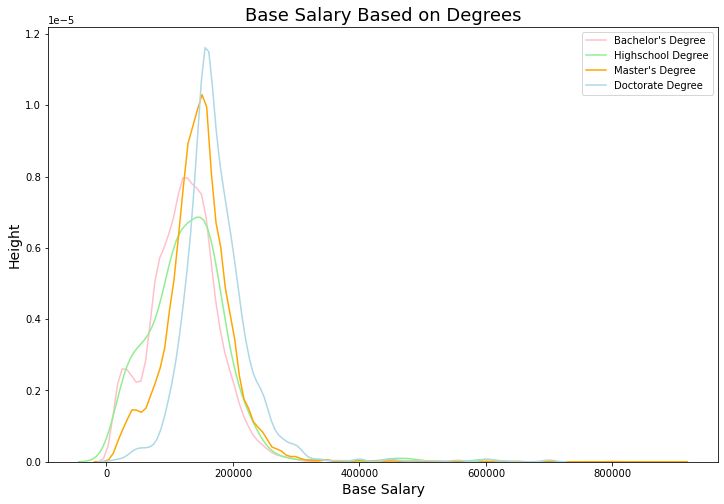

In [15]:
plt.figure(figsize=(12,8))
sns.kdeplot(df[df["Bachelors_Degree"]==1]["basesalary"], color="pink", label="Bachelor's Degree")
sns.kdeplot(df[df["Highschool"]==1]["basesalary"], color="lightgreen", label="Highschool Degree")
sns.kdeplot(df[df["Masters_Degree"]==1]["basesalary"], color="orange", label="Master's Degree")
sns.kdeplot(df[df["Doctorate_Degree"]==1]["basesalary"], color="lightblue", label="Doctorate Degree")
plt.title("Base Salary Based on Degrees", size=18)
plt.xlabel("Base Salary", size=14)
plt.ylabel("Height", size=14)
plt.legend()
plt.show()

kdeplot() is a method for visualizing the distribution of observations in a dataset. To be clear, it took some research to plot this graph. The bottom of each line represents the density for the value at that point.

It is an unexpected result that high school graduates received a higher salary than university graduates at the highest value on their scale (According to the top points of their lines.)

Among the reasons for this, we think that the employees may have started their business life early, thus they may have developed themselves much better.

In addition to these, we can say that companies do not observe a big difference between high school and university graduation.

Apart from these, we got the result we expected from the master's and doctorate degree lines.

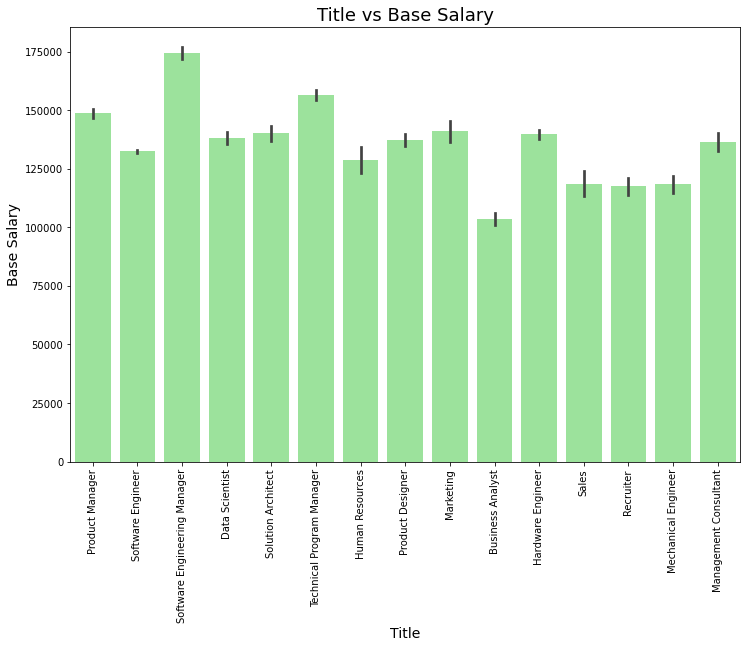

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x=df["title"], y=df["basesalary"], color='lightgreen')
plt.xticks(rotation=90)
plt.title("Title vs Base Salary", size=18)
plt.xlabel("Title", size=14)
plt.ylabel("Base Salary", size=14)
plt.show()

Another question on our mind was which title earned more money. That's why we wanted to answer this question with using a barplot().

Based on our results from the graph, Software Engineering Managers earn the highest salary by a noticeable difference. Then comes Technical Program Managers and Product Managers. From here, we learned how important it can be for us to be promoted in our business lives.

Obviously, the least paid title is Bushness Analyst. We looked into why they earn so little compared to other titles, but we couldn't find a convincing answer.

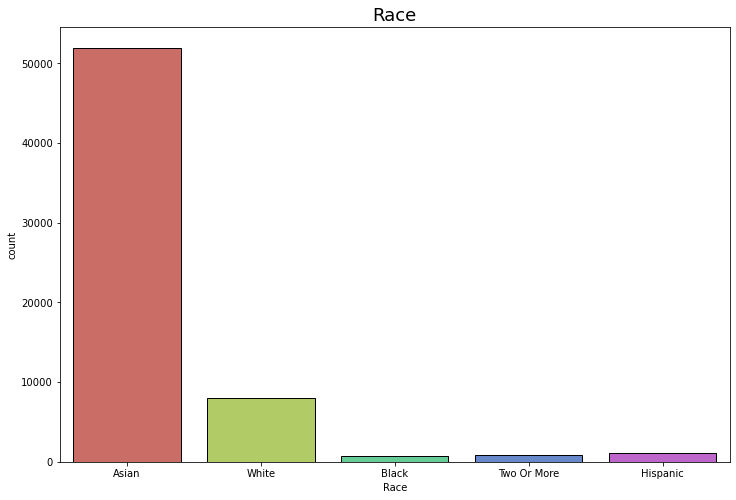

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Race', palette="hls",edgecolor="black")
plt.title('Race', size=18);

We were also curious about races working in companies. Frankly, the result we got did not surprise us at all, especially when there is a China+India duo among Asians.

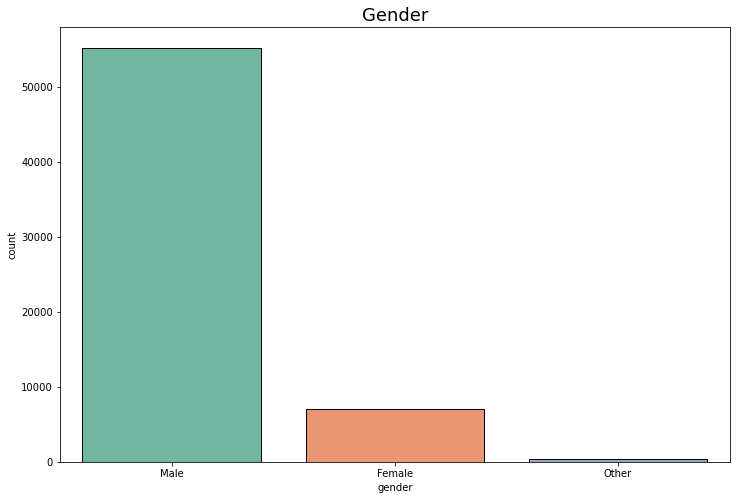

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'gender', palette="Set2",edgecolor="black")
plt.title('Gender', size=18)
plt.xticks();

Finally, we wanted to observe the distribution of men and women in companies. Despite the century we are in, we were surprised that the range in the distribution was so large. We would like to observe that more women are involved in the mentioned companies.

## 4. Predictive Modelling

If the values of the features are closer to each other there are chances for the algorithm to work well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower. 

But, as you can see above, our data set contains highly distributed data, and so, our data points are far away from each other.

So we are using scaling method to make them closer to each other. In other words, we are making data points generalized so that the distance between them will be lower.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_df = scaler.fit_transform(df[numerical.columns])
standardized_df = pd.DataFrame(standardized_df, columns=numerical.columns)
standardized_df.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,-0.646947,-0.976665,-0.368321,-0.483739,-0.384569,-0.348567,-0.368935,0.658627,-1.702592,-0.570732,-0.501915,-0.172151,-0.071657,-0.075495,-0.481059,-0.383513,-0.114026,-0.105536,-0.135539
1,-0.842552,-0.377380,0.091287,-2.227289,-0.628845,-0.721963,-0.364893,0.658627,-1.702551,-0.570732,-0.501915,-0.172151,-0.071657,-0.075495,-0.481059,-0.383513,-0.114026,-0.105536,-0.135539
2,0.678816,0.136293,-0.827929,0.298414,-0.628845,-0.721963,0.250161,0.700029,-1.702510,-0.570732,-0.501915,-0.172151,-0.071657,-0.075495,-0.481059,-0.383513,-0.114026,-0.105536,-0.135539
3,1.127981,-0.034932,0.704097,0.331003,1.569641,0.584924,-0.356958,0.658627,-1.702347,-0.570732,-0.501915,-0.172151,-0.071657,-0.075495,-0.481059,-0.383513,-0.114026,-0.105536,-0.135539
4,-0.429609,-0.377380,0.091287,-2.227289,-0.628845,-0.721963,-0.379416,0.658627,-1.702265,-0.570732,-0.501915,-0.172151,-0.071657,-0.075495,-0.481059,-0.383513,-0.114026,-0.105536,-0.135539


As you can see from the example charts above, we can say that the dependent value in our dataset is "basesalary". Accordingly, we defined our dependent (y) variable as "basesalary" and our other features as independent(x) variable. We decided to give 70% rate to our train set, 10% rate to our validation set and 20% rate to our test set. By doing this, we aimed to design a better prediction-model.

In [20]:
from sklearn.model_selection import train_test_split
y = pd.DataFrame(standardized_df['basesalary'], columns = ['basesalary'])
x = standardized_df.drop(columns = ['basesalary'])
X_train, X_other, y_train, y_other = train_test_split(x,y, train_size=0.7, random_state = 1)
X_valid, X_test, y_valid, y_test = train_test_split(X_other,y_other, test_size=2/3, random_state = 1)

It would be more accurate to create a regression model, because the value that to be estimated is numerical and continuous.

Below we have written the necessary code to find an optimal k value according to the KNN regression model. The code contains the elbow method logic. To explain simply, it shows us the value of k, which has the lowest error rate among the numbers in the range we gave, and the error given by this value.

The reason why it is Euclidean is that we tried it with the default and manhattan metrics before, and we reached the smallest error value with Euclidean metric.

The reason why we gave 9 to the range is that the lowest value is 8 until at least 50, so we did not want to tire the computer ram more, we also saved time. (We tested this function up to k=50 before.)

In [21]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
def euclidean_elbow(rng):
    euclidean_mse = []
    for k in range(1,int(rng)):
        regressor = KNN(n_neighbors=k, metric= 'euclidean')
        regressor.fit(X_train, y_train)
        valid_predict = pd.DataFrame(regressor.predict(X_valid), columns= ['basesalary'])
        error = mse(y_valid, valid_predict)
        euclidean_mse.append(error)
    min_mse_euclidean = min(euclidean_mse)
    for i in range(len(euclidean_mse)):
        if euclidean_mse[i] == min_mse_euclidean:
            print("Best k value for KNN regressor is ", i+1)
            print("Error for Validation Set in kNN Regressor: ", min_mse_euclidean)
            print("Accuracy for Validation Set in kNN Regressor: ", 1-min_mse_euclidean)
euclidean_elbow(9)             

Best k value for KNN regressor is  8
Error for Validation Set in kNN Regressor:  0.2225894265304677
Accuracy for Validation Set in kNN Regressor:  0.7774105734695322


Then we wanted to try Linear regression and see which one we got smaller error.

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = pd.DataFrame(lr.predict(X_valid), columns= ['basesalary'])
errorLinear = mse(y_valid, y_pred)
print('Error for Validation Set in Linear Regressor:', errorLinear)
print('Accuracy for Validation Set in Linear Regressor:', 1-errorLinear)

Error for Validation Set in Linear Regressor: 0.4550329705565319
Accuracy for Validation Set in Linear Regressor: 0.5449670294434681


According to the results we have obtained on the validation set above, we have seen that the KNN regression model gives a clearly more accurate ratio. In fact, if we consider that the result we got is on a very large data set, we can say that an error value of 0.223 is quite successful.

## 5.Model Evaluation and Visualizations

In the final stage of our project, we will apply and interpret the regression model we have created (also selected) on the test set.

In [23]:
regressor = KNN(n_neighbors=8, metric= 'euclidean')
regressor.fit(X_train, y_train)
valid_predict = pd.DataFrame(regressor.predict(X_test), columns= ['basesalary'])
errorKNN = mse(y_test, valid_predict)
print("Error for Validation Set in kNN Regressor: ", errorKNN)
print("Accuracy for Validation Set in kNN Regressor: ", 1 - errorKNN)

Error for Validation Set in kNN Regressor:  0.25447071853565306
Accuracy for Validation Set in kNN Regressor:  0.7455292814643469


Compared to the result we got from the validation set, we observe that the error rate of the result from the test set has increased slightly. However, the fact that the result we got has not changed much shows that we have trained our model well, that we have given appropriate ratios to the appropriate train-validation-test sets, and that we have chosen our regression model correctly.

In [24]:
!pip install mglearn
import mglearn

We have plotted the graph below to see the distribution of our train and test set. While doing this, we used a different library.

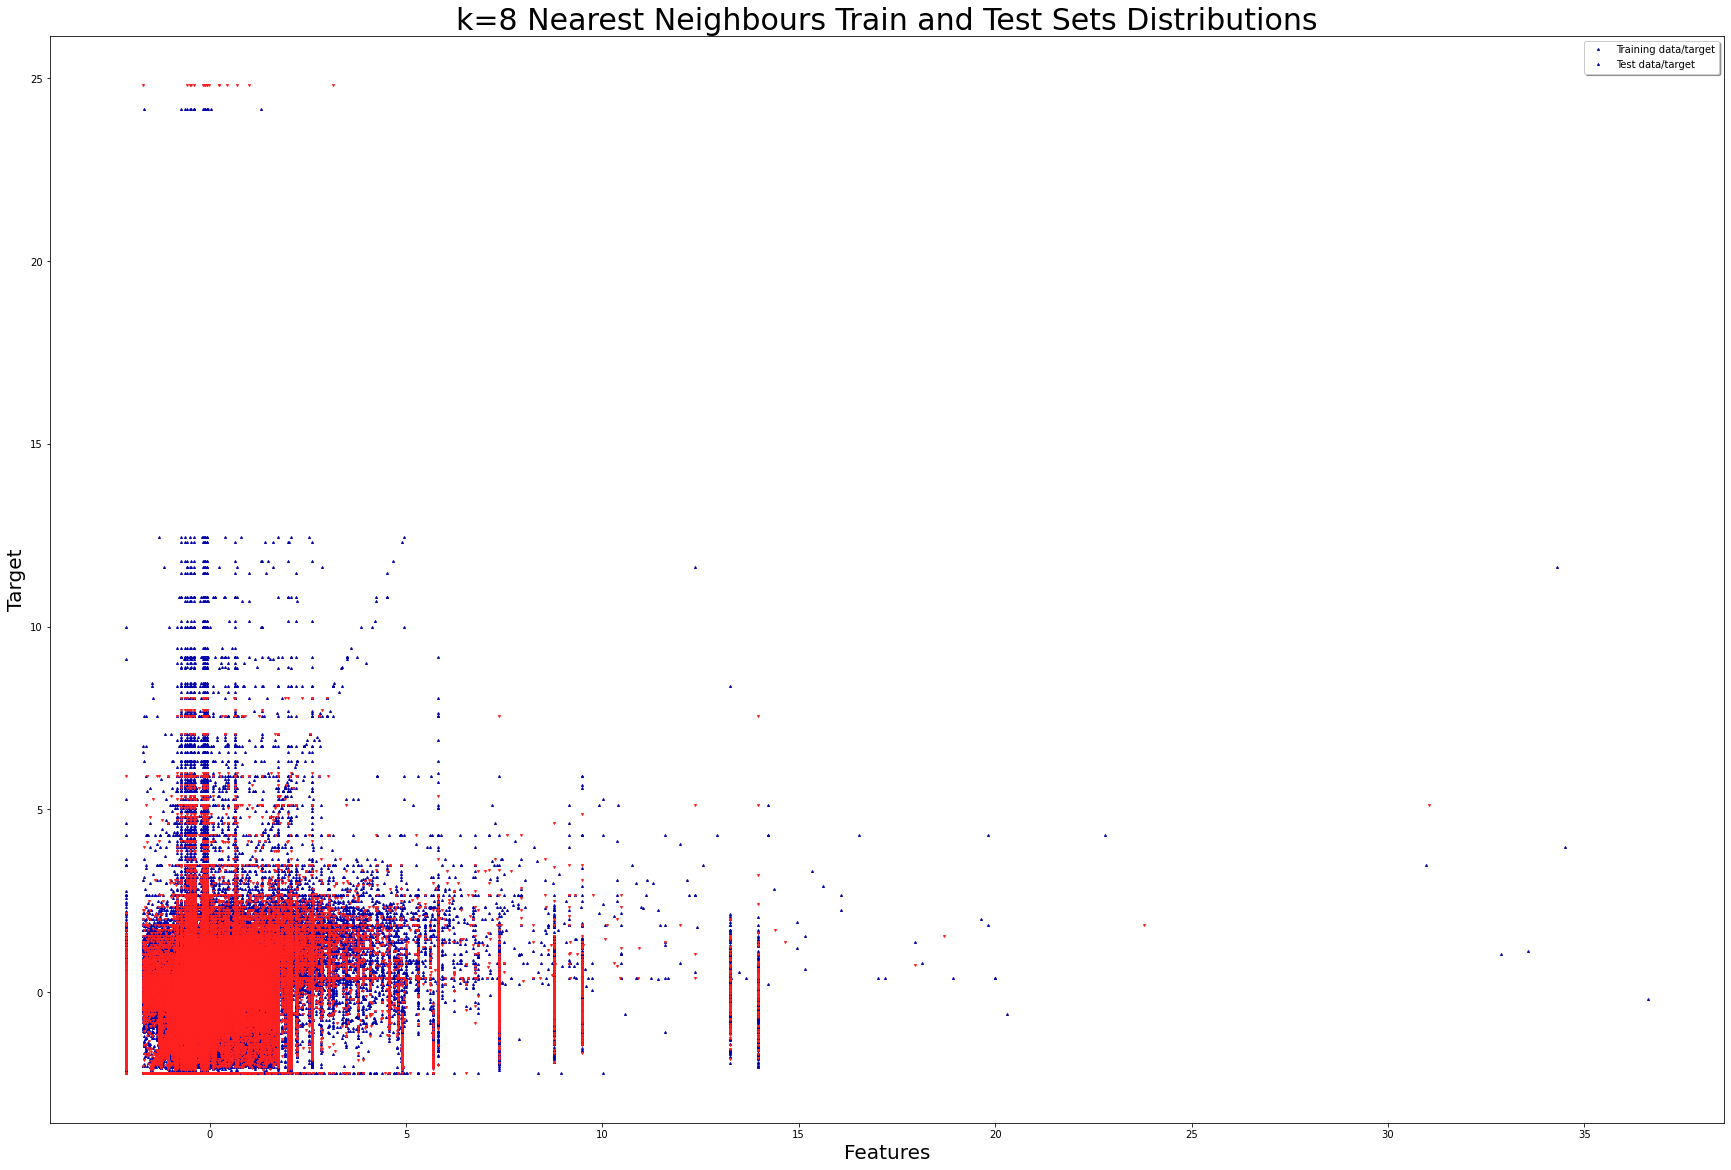

In [25]:
fig, axes = plt.subplots(figsize=(30,20))
rng = np.random.RandomState(0)
line = np.linspace(-30, 30, 43848).reshape(-1, 1)
ax1 = axes
n=8
reg = KNN(n_neighbors = n)
y_ = reg.fit(X_train, y_train)
l1 = ax1.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=2)
l2 = ax1.plot(X_test, y_test, 'v', c= mglearn.cm2(1), markersize = 2)
ax1.set_title("k=8 Nearest Neighbours Train and Test Sets Distributions", size= 30)
ax1.set_xlabel("Features", size= 20)
ax1.set_ylabel("Target", size=20)
axes.legend(["Training data/target", "Test data/target"], loc= "best",shadow=True, fancybox=True)

plt.show()

As seen above, our red dots come from the training set and the blue dots come from the test set. Looking at these points, we can say that another reason why the error rate is low is, due to the fact that the train and test points are very close to each other.

Below, we wanted to examine together the estimated points obtained by our regression model and the test points based on the yearsofexperience feature.

We used the plt.scatter() method to accurately show the data points. We used distance as the weight parameter.

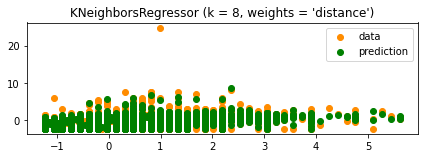

In [26]:
X_graph = pd.DataFrame(X_test.yearsofexperience)

knn = KNN(8, weights="distance")
y_ = knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

plt.figsize=(30,30)
plt.subplot(2, 1, 1 + 1)
plt.scatter(X_graph, y_test, color="darkorange", label="data")
plt.scatter(X_graph, y_pred1, color="green", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (8,"distance"))
plt.tight_layout()
plt.show()

By looking at the graph we have obtained, we see that we have made very close estimations to the actual data values.

However, we think that it is very difficult and unreasonable to plot our estimation points on a data set with this density. Because so many data points overlap, it becomes difficult to observe each point in detail. Therefore, we wanted to show the prediction points of our regression model by splitting our dataset into a much smaller sample below.

In [27]:
X_train1, asd, y_train1, asdt = train_test_split(X_train,y_train, train_size=0.005, random_state = 53)
asd, X_test1, asdt, y_test1 = train_test_split(X_test,y_test, test_size=0.005, random_state = 53)

Below, we wanted to examine the points predicted by our regression model and how accurate these points are based on the totalyearlycompensation feature. 

In addition, we wanted to create separate graphs with both the "distance" and "uniform" weights, in order to see how the weight parameter we used causes the differences. For this, it was enough to take the code into the for loop.

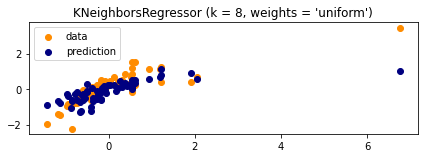

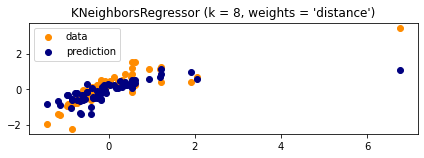

In [28]:
for i, weights in enumerate(["uniform", "distance"]):
    X_graph = pd.DataFrame(X_test1.totalyearlycompensation)
    knn = KNN(8, weights=weights)
    y_ = knn.fit(X_train1,y_train1)
    y_pred1 = knn.predict(X_test1)
    plt.figsize=(30,30)
    plt.subplot(2, 1, i + 1)
    plt.scatter(X_graph, y_test1, color="darkorange", label="data")
    plt.scatter(X_graph, y_pred1, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (8, weights))
    plt.tight_layout()
    plt.show()

Although there are some minor differences between the two graphs, we do not see a huge difference. When data points are spread vertically, we see more clustered predicted points, and when data points are spread horizontally, we see more distributed predicted points.

# Bonus Step

Based on our instructors advices, we would like to add PCA at the end of our project to visualize our components clearly. We will use this method for dimensionality reduction. For this step, we benefited from too many sources.

In [29]:
from sklearn.decomposition import PCA

pca_stem = PCA(n_components=2)
principalC_stem = pca_stem.fit_transform(x)

principal_stem_Df = pd.DataFrame(data = principalC_stem
                                 , columns = ['principal component 1', 'principal component 2'])
principal_stem_Df.head()


,principal component 1,principal component 2
0,-0.376981,-2.257982
1,-0.396634,-2.088948
2,0.345907,-1.964155
3,2.363152,-1.174201
4,-0.172653,-2.043904


In [30]:
print('Explained variation per principal component: {}'.format(pca_stem.explained_variance_ratio_))

Explained variation per principal component: [0.14740452 0.09922345]


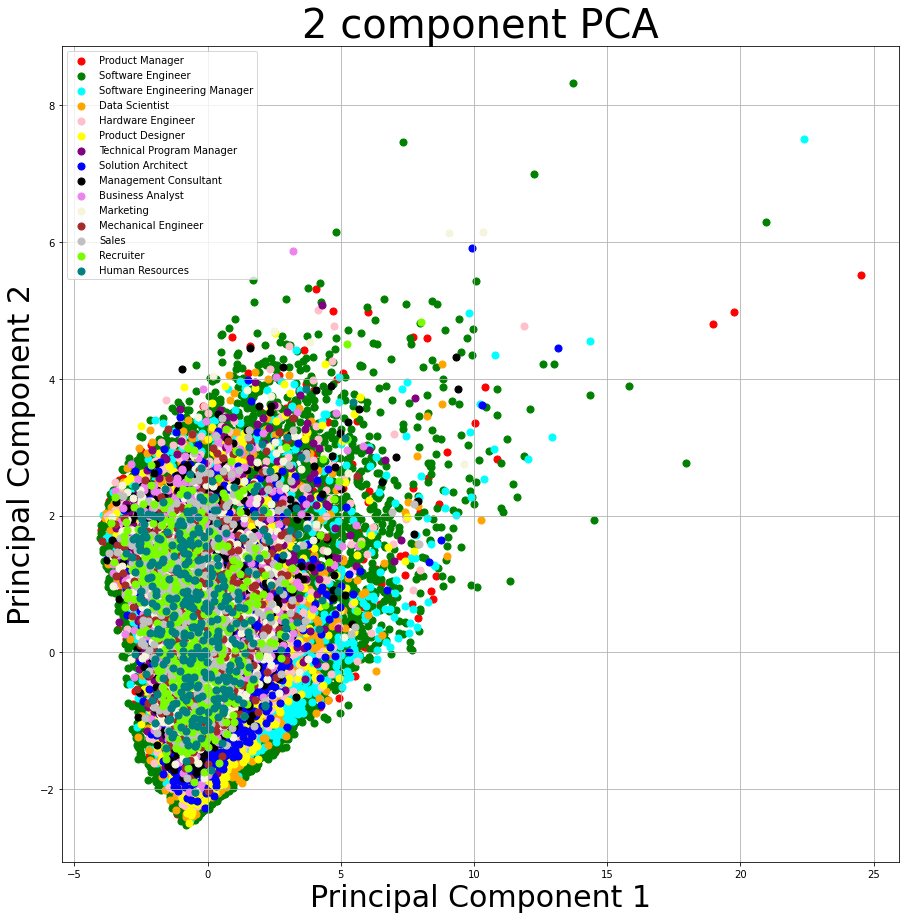

In [31]:
finalDf = pd.concat([principal_stem_Df, df[['title']]], axis = 1)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 30)
ax.set_ylabel('Principal Component 2', fontsize = 30)
ax.set_title('2 component PCA', fontsize = 40)
targets = ['Product Manager', 'Software Engineer','Software Engineering Manager','Data Scientist','Hardware Engineer','Product Designer','Technical Program Manager','Solution Architect','Management Consultant','Business Analyst','Marketing','Mechanical Engineer','Sales','Recruiter','Human Resources']
colors = ['r', 'g', 'cyan', 'orange', 'pink', 'yellow', 'purple', 'b', 'black', 'violet', 'beige', 'brown', 'silver', 'lawngreen', 'teal']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['title'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

We can see our title components distributions based on this graph.

# Conclusion

In our project, we examined a data set containing many features of employees. First of all, we separated the features that we will not use from our data set. Also we filled the missing data appropriately. 

Then, we examined in detail what are the features and their meanings to our project. We checked which interactions there are between features. Next, we wanted to observe which features affect the employee's salary, and we drew some graphs for it.

Accordingly, we wanted to establish a model that predicts the base salary that the employee will receive according to the given features. We benefited from different algorithms when choosing this kNN regression model. Then we created a regression model with the algorithm we chose, and checked how well this regression model works. We also tested this regression model by visualizing it on different features.

# References

https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html

https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

https://towardsdatascience.com/k-nearest-neighbors-knn-how-to-make-quality-predictions-with-supervised-learning-d5d2f326c3c2

https://realpython.com/knn-python/

https://www.analyticsvidhya.com/blog/2021/02/diminishing-the-dimensions-with-pca/

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60